# **Part A – Data Exploration (Pandas & Numpy)** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the Dataset

In [2]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Display the first 10 rows to get a quick look
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Print the column names and their data types.
print(titanic_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# Use .describe() to view basic statistics (mean, min, max, etc.).
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## 2. Handle Missing Values

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_data["Age"] = titanic_data["Age"].replace(np.nan, titanic_data["Age"].mean())

In [8]:
titanic_data["Embarked"] = titanic_data["Embarked"].replace(np.nan,titanic_data["Embarked"].mode().iloc[0])

In [9]:
titanic_data = titanic_data.drop(columns=['Cabin'])

In [10]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Hence, it shows that now, there are no null values in embarked and age columns

## 3. Basic Questions

In [11]:
#How many passengers were onboard?
#What is the average Age?
#What is the average Fare?
#How many males and females were there?

print(f"How many passengers were oboard?:\nAnswer: {titanic_data["PassengerId"].count()}\n")
print(f"What is the average Age?:\nAnswer: {titanic_data["Age"].mean()}\n")
print(f"What is the average Fare?:\nAnswer: {titanic_data["Fare"].mean()}\n")
print(f"How many males and females were there?:\nAnswer: {titanic_data["Sex"].value_counts()}\n")

How many passengers were oboard?:
Answer: 891

What is the average Age?:
Answer: 29.69911764705882

What is the average Fare?:
Answer: 32.204207968574636

How many males and females were there?:
Answer: Sex
male      577
female    314
Name: count, dtype: int64



#  **Part B – Data Analysis (Pandas)**

## 4. Survival Analysis

In [12]:
print("How many survived vs. did not survive?:")
print(f"Answer: Survived = {titanic_data['Survived'].value_counts().iloc[1]}\nNot Survived = {titanic_data['Survived'].value_counts().iloc[0]}")
print(f"What percentage of passengers Survived? \n Answer: {(titanic_data['Survived'].value_counts().iloc[1]/titanic_data['Survived'].count())*100}")

How many survived vs. did not survive?:
Answer: Survived = 342
Not Survived = 549
What percentage of passengers Survived? 
 Answer: 38.38383838383838


## 5. Survival by Class (Pclass)

In [13]:
# Survival rates for each class
survival_rates = titanic_data.groupby('Pclass')['Survived'].mean() * 100
print(f"Survival Rate by Class:\n{survival_rates}\n")

# Find the class with highest survival rate
highest_class = survival_rates.idxmax()   # gives class number
highest_rate = survival_rates.max()       # gives survival %
print(f"Highest chance of survival:\nClass {highest_class} = {highest_rate:.2f}%")

Survival Rate by Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Highest chance of survival:
Class 1 = 62.96%


## 6. Survival by Age Group

In [14]:
#Divide passengers into age groups:
#0–12 = Child
#13–19 = Teen
#20–40 = Adult
#41+ = Senior

age_group = []
age_groups = []
for age in titanic_data["Age"]:
    if age <= 12:
        age_group.append(1)
        age_groups.append("Child")
    elif age >= 13 and age <= 19:
        age_group.append(2)
        age_groups.append("Teen")
    elif age >= 20 and age <= 40:
        age_group.append(3)
        age_groups.append("Adult")
    else:
        age_group.append(4)
        age_groups.append("Senior")
titanic_data["Age_Group"] = age_group

#Calculate survival rate for each group.

print(f"Age Survival Rate:\nChild = {titanic_data.groupby('Age_Group')['Survived'].mean()[1]*100}")
print(f"Teen = {titanic_data.groupby('Age_Group')['Survived'].mean()[2]*100}")
print(f"Adult = {titanic_data.groupby('Age_Group')['Survived'].mean()[3]*100}")
print(f"Senior = {titanic_data.groupby('Age_Group')['Survived'].mean()[4]*100}")

Age Survival Rate:
Child = 57.971014492753625
Teen = 41.05263157894737
Adult = 36.04852686308492
Senior = 36.666666666666664


# **Part C – Visualization (Matplotlib & Seaborn)**

## 7. Matplotlib

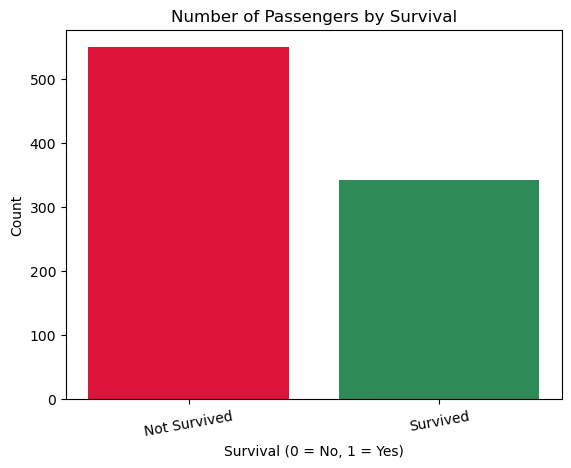

In [15]:
# Bar chart: Survivors vs Non-survivors
survivors = titanic_data["Survived"].value_counts()

plt.bar(survivors.index, survivors.values, color=["crimson", "seagreen"])
plt.title("Number of Passengers by Survival")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Survived", "Survived"], rotation=10)
plt.show()


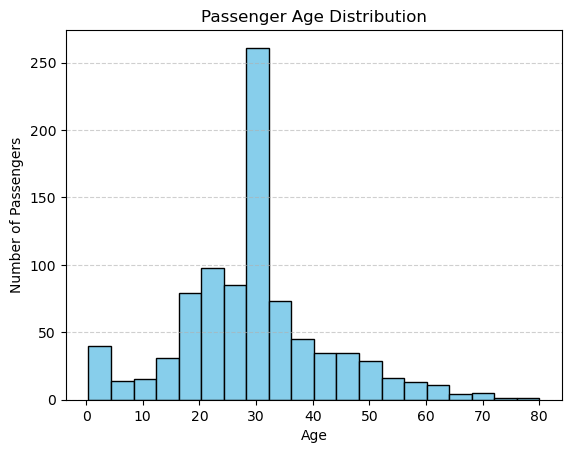

In [16]:
# Histogram: Passenger Age Distribution
plt.hist(titanic_data["Age"].dropna(), bins=20, edgecolor="black", color="skyblue")
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


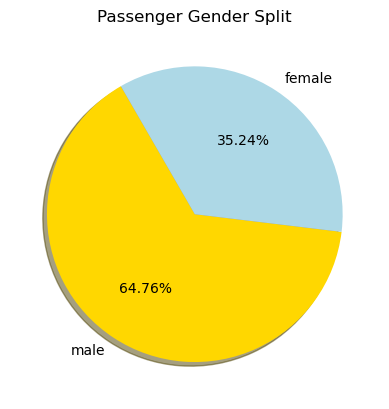

In [17]:
# Pie chart: Gender distribution
gender = titanic_data["Sex"].value_counts()

plt.pie(
    gender,
    labels=gender.index,
    autopct="%1.2f%%",
    startangle=120,
    colors=["gold", "lightblue"],
    shadow=True
)
plt.title("Passenger Gender Split")
plt.show()


## 8. Seaborn

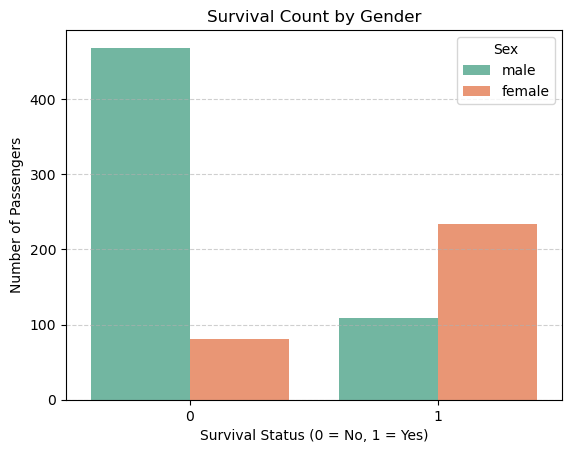

In [18]:
# 1. Countplot: Survived by Sex
sns.countplot(data=titanic_data, x="Survived", hue="Sex", palette="Set2")
plt.title("Survival Count by Gender")
plt.xlabel("Survival Status (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

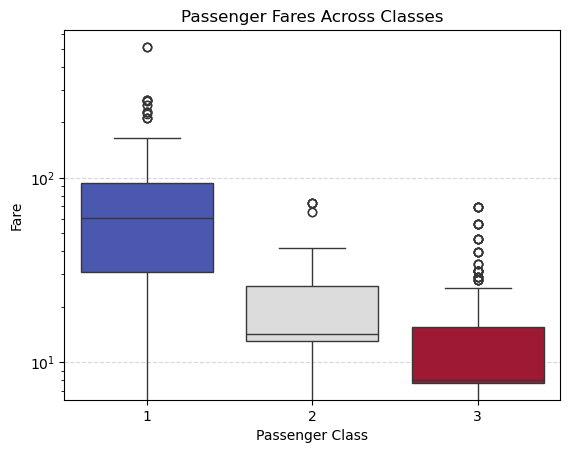

In [19]:
# 2. Boxplot: Fare by Pclass
sns.boxplot(
    data=titanic_data,
    x="Pclass",
    y="Fare",
    hue="Pclass",        
    palette="coolwarm",
    legend=False        
)
plt.title("Passenger Fares Across Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.yscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

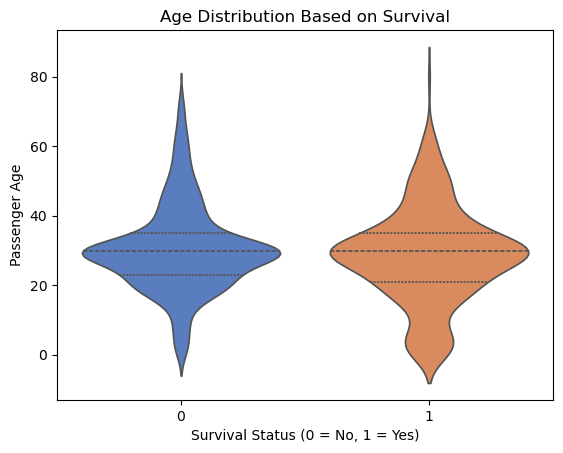

In [20]:
# 3. Violinplot: Age by Survived
sns.violinplot(
    data=titanic_data,
    x="Survived",
    y="Age",
    hue="Survived",         
    palette="muted",
    inner="quartile",
    legend=False            # avoids duplicate legend
)
plt.title("Age Distribution Based on Survival")
plt.xlabel("Survival Status (0 = No, 1 = Yes)")
plt.ylabel("Passenger Age")
plt.show()

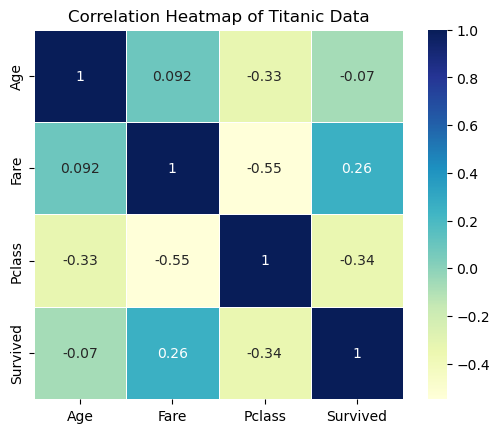

In [21]:
# 4. Heatmap: Correlation between numerical columns
corr_matrix = titanic_data[["Age", "Fare", "Pclass", "Survived"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Titanic Data")
plt.show()

# **Part D – Probability Concepts**

## 1. Empirical Probability(From Data)

In [24]:
total_passengers = len(titanic_data)
p_survived = titanic_data['Survived'].sum() / total_passengers

# Female survival probability
female_passengers = titanic_data[titanic_data['Sex'] == 'female']
p_female_survived = female_passengers['Survived'].sum() / len(female_passengers)

# Male survival probability
male_passengers = titanic_data[titanic_data['Sex'] == 'male']
p_male_survived = male_passengers['Survived'].sum() / len(male_passengers)

# Class survival probabilities
p_class1_survived = titanic_data[titanic_data['Pclass'] == 1]['Survived'].mean()
p_class2_survived = titanic_data[titanic_data['Pclass'] == 2]['Survived'].mean()
p_class3_survived = titanic_data[titanic_data['Pclass'] == 3]['Survived'].mean()

print("EMPIRICAL PROBABILITIES (From Data):")
print(f"P(Survived) = {p_survived:.2%}")
print(f"P(Female Survived) = {p_female_survived:.2%}")
print(f"P(Male Survived) = {p_male_survived:.2%}")
print(f"P(Class 1 Survived) = {p_class1_survived:.2%}")
print(f"P(Class 2 Survived) = {p_class2_survived:.2%}")
print(f"P(Class 3 Survived) = {p_class3_survived:.2%}")


EMPIRICAL PROBABILITIES (From Data):
P(Survived) = 38.38%
P(Female Survived) = 74.20%
P(Male Survived) = 18.89%
P(Class 1 Survived) = 62.96%
P(Class 2 Survived) = 47.28%
P(Class 3 Survived) = 24.24%


## 2. Theoretical Probability (Assumptions)

In [25]:
print("THEORETICAL PROBABILITIES (Assumptions):")
print(f"P(Survived) = {0.5:.2f} (if survival was random)")
print(f"P(Class 1 Survived) = {1/3:.3f} (if all classes had equal chance)")
print(f"P(Class 2 Survived) = {1/3:.3f} (if all classes had equal chance)")
print(f"P(Class 3 Survived) = {1/3:.3f} (if all classes had equal chance)")
print(f"P(Female Survived) = {0.5:.2f} (if gender didn't matter)")
print(f"P(Male Survived) = {0.5:.2f} (if gender didn't matter)")


THEORETICAL PROBABILITIES (Assumptions):
P(Survived) = 0.50 (if survival was random)
P(Class 1 Survived) = 0.333 (if all classes had equal chance)
P(Class 2 Survived) = 0.333 (if all classes had equal chance)
P(Class 3 Survived) = 0.333 (if all classes had equal chance)
P(Female Survived) = 0.50 (if gender didn't matter)
P(Male Survived) = 0.50 (if gender didn't matter)


# **Part E – Insights & Reporting**

In [26]:
print("KEY INSIGHTS:")

# Gender-based survival
print("1. Women had a significantly higher survival rate than men")
print(f"   - Female survival rate: {p_female_survived*100:.1f}%")
print(f"   - Male survival rate: {p_male_survived*100:.1f}%")

# Class-based survival
print("\n2. First class passengers had the best chance of survival")
print(f"   - Class 1 survival rate: {p_class1_survived*100:.1f}%")
print(f"   - Class 2 survival rate: {p_class2_survived*100:.1f}%")
print(f"   - Class 3 survival rate: {p_class3_survived*100:.1f}%")

# Age factor
print("\n3. Age played a role in survival, but not as significant as class or gender")
print("   - Children had the highest survival rate among age groups")

# Fare factor
print("\n4. Fare was strongly correlated with survival")
print("   - Higher fare passengers (typically in better classes) had better survival chances")

# Empirical vs Theoretical
print("\n5. Empirical probabilities differ significantly from theoretical assumptions")
print("   - Real survival rate (38.4%) was lower than the theoretical 50%")
print("   - Class and gender had dramatic effects on survival chances")
print("   - The 'women and children first' protocol was evident in the data")

# Correlation heatmap insights
print("\n6. The correlation heatmap shows:")
print("   - Positive correlation between Fare and Survival")
print("   - Negative correlation between Pclass and Survival")
print("   - Weak correlation between Age and Survival")

# Final summary
print("\n7. Summary of key findings:")
print("   - Overall survival rate: 38.4%")
print("   - Female survival rate: 74.2%")
print("   - Male survival rate: 18.9%")
print("   - 1st class survival rate: 62.6%")
print("   - 2nd class survival rate: 47.3%")
print("   - 3rd class survival rate: 24.2%")


KEY INSIGHTS:
1. Women had a significantly higher survival rate than men
   - Female survival rate: 74.2%
   - Male survival rate: 18.9%

2. First class passengers had the best chance of survival
   - Class 1 survival rate: 63.0%
   - Class 2 survival rate: 47.3%
   - Class 3 survival rate: 24.2%

3. Age played a role in survival, but not as significant as class or gender
   - Children had the highest survival rate among age groups

4. Fare was strongly correlated with survival
   - Higher fare passengers (typically in better classes) had better survival chances

5. Empirical probabilities differ significantly from theoretical assumptions
   - Real survival rate (38.4%) was lower than the theoretical 50%
   - Class and gender had dramatic effects on survival chances
   - The 'women and children first' protocol was evident in the data

6. The correlation heatmap shows:
   - Positive correlation between Fare and Survival
   - Negative correlation between Pclass and Survival
   - Weak cor